# Chapter 2: The Pandas essentials for data analysis

In [106]:
!pip install openpyxl

  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [2]:
import pandas as pd

## Get the data

### Read a CSV file from a website into a DataFrame

In [3]:
url = 'https://data.cdc.gov/api/views/v6ab-adf5/rows.csv?accessType=DOWNLOAD'
mortality_data = pd.read_csv(url)

<AxesSubplot:xlabel='Year'>

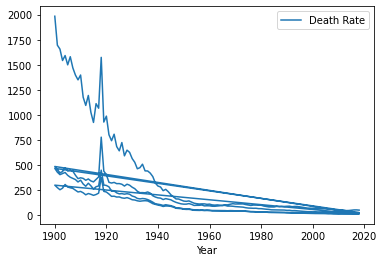

In [7]:
mortality_data.plot.line(x="Year", y = "Death Rate")

In [4]:
mortality_data

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


### Use DataFrame constructor to build a DataFrame object

In [9]:
# Dataframne A - col list + list of lists
df_data=[[1900, '1-4 Years', 1983.8],
         [1901, '1-4 Years', 1695.0]]
df_columns=['Year', 'Age Group', 'Death Rate']
mortality_df = pd.DataFrame(
    data=df_data,
    columns=df_columns
    )
mortality_df    

In [13]:
# Dataframe B - dictionary of dictionaries
df_data=[{"Year":1900, "Age Group":'1-4 Years', "Death Rate": 1983.8},
         {"Year":1901, "Age Group":'1-4 Years', "Death Rate": 1695.0}]
mortality_df = pd.DataFrame(
    data=df_data,
    )
mortality_df    

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0


### Save and restore a DataFrame

In [14]:
mortality_data.to_pickle('mortality_data.pkl')

In [15]:
mortality_data = pd.read_pickle('mortality_data.pkl')

In [16]:
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


## Examine and clean the data

### Display the data

In [17]:
mortality_data

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [19]:
mortality_data.head(7)

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
5,1905,1-4 Years,1498.9
6,1906,1-4 Years,1580.0


In [20]:
mortality_data.tail(3)

,Year,Age Group,Death Rate
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


In [21]:
display(mortality_data)

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [22]:
with pd.option_context(
    'display.max_rows', 5,
    'display.max_columns', None):
    display(mortality_data)

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
...,...,...,...
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


### Display the DataFrame attributes

In [23]:
mortality_data.values

array([[1900, '1-4 Years', 1983.8],
       [1901, '1-4 Years', 1695.0],
       [1902, '1-4 Years', 1655.7],
       ...,
       [2016, '15-19 Years', 51.2],
       [2017, '15-19 Years', 51.5],
       [2018, '15-19 Years', 49.2]], dtype=object)

In [24]:
print("Index:  ", mortality_data.index)
print("Columns:", mortality_data.columns)
print("Size:   ", mortality_data.size)
print("Shape:  ", mortality_data.shape)

Index:   RangeIndex(start=0, stop=476, step=1)
Columns: Index(['Year', 'Age Group', 'Death Rate'], dtype='object')
Size:    1428
Shape:   (476, 3)


### Use the columns attribute to replace spaces with nothing

In [25]:
mortality_data.columns

Index(['Year', 'Age Group', 'Death Rate'], dtype='object')

In [26]:
mortality_data.columns = mortality_data.columns.str.replace(' ', '')

In [27]:
mortality_data.columns

Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')

In [28]:
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


### Use the info(), nunique(), and describe() methods

In [29]:
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int64  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [30]:
mortality_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int64  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.7 KB


In [31]:
mortality_data.nunique()

Year         119
AgeGroup       4
DeathRate    430
dtype: int64

<AxesSubplot:>

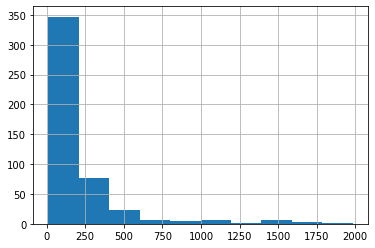

In [35]:
mortality_data.DeathRate.hist()

In [32]:
mortality_data.describe()

,Year,DeathRate
count,476.000000,476.000000
mean,1959.000000,192.924160
std,34.387268,293.224216
min,1900.000000,11.400000
25%,1929.000000,40.575000
50%,1959.000000,89.500000
75%,1989.000000,222.575000
max,2018.000000,1983.800000


In [37]:
mortality_data.describe(include='O')

,AgeGroup
count,476
unique,4
top,1-4 Years
freq,119


In [36]:
mortality_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,476.0,1959.00000,34.387268,1900.0,1929.000,1959.0,1989.000,2018.0
DeathRate,476.0,192.92416,293.224216,11.4,40.575,89.5,222.575,1983.8


## Access the data

### Access columns

In [38]:
mortality_data.DeathRate.head(2)

0    1983.8
1    1695.0
Name: DeathRate, dtype: float64

In [39]:
type(mortality_data.DeathRate)

pandas.core.series.Series

In [40]:
mortality_data['DeathRate'].head(2)

0    1983.8
1    1695.0
Name: DeathRate, dtype: float64

In [41]:
mortality_data[['Year','DeathRate']].head(2)

,Year,DeathRate
0,1900,1983.8
1,1901,1695.0


In [42]:
type(mortality_data[['Year','DeathRate']])

pandas.core.frame.DataFrame

### Access rows

In [46]:
mortality_data.query("Year==1900")

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
119,1900,5-9 Years,466.1
238,1900,10-14 Years,298.3
357,1900,15-19 Years,484.8


In [47]:
mortality_data.query("Year == 2000 and AgeGroup != '1-4 Years'")

,Year,AgeGroup,DeathRate
219,2000,5-9 Years,15.8
338,2000,10-14 Years,20.3
457,2000,15-19 Years,67.1


In [48]:
mortality_data.query('Year == 1900 or Year == 2000').head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
100,2000,1-4 Years,32.4
119,1900,5-9 Years,466.1
219,2000,5-9 Years,15.8
238,1900,10-14 Years,298.3


In [50]:
# use backticks if a column name contains spaces
mortality_data.query('Year == 2000 and `Age Group` != "1-4 Years"')

,Year,AgeGroup,DeathRate
219,2000,5-9 Years,15.8
338,2000,10-14 Years,20.3
457,2000,15-19 Years,67.1


### Access a subset of rows and columns

In [51]:
mortality_data.query('Year == 1900').DeathRate.head()

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64

In [52]:
mortality_data.query('Year == 1900')['DeathRate'].head()

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64

In [53]:
mortality_data.query('Year == 1900')[['DeathRate']].head()

,DeathRate
0,1983.8
119,466.1
238,298.3
357,484.8


In [54]:
mortality_data.query('Year == 1900')[['AgeGroup','DeathRate']].head()

,AgeGroup,DeathRate
0,1-4 Years,1983.8
119,5-9 Years,466.1
238,10-14 Years,298.3
357,15-19 Years,484.8


### Access rows with the loc[] accessor

In [55]:
mortality_data.loc[[0,5,10]]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
5,1905,1-4 Years,1498.9
10,1910,1-4 Years,1397.3


In [56]:
mortality_data.loc[4:6]

,Year,AgeGroup,DeathRate
4,1904,1-4 Years,1591.5
5,1905,1-4 Years,1498.9
6,1906,1-4 Years,1580.0


In [57]:
mortality_data.loc[0:20:5]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
5,1905,1-4 Years,1498.9
10,1910,1-4 Years,1397.3
15,1915,1-4 Years,924.2
20,1920,1-4 Years,987.2


In [59]:
mortality_data.query("Year == 1917")

,Year,AgeGroup,DeathRate
17,1917,1-4 Years,1066.0
136,1917,5-9 Years,290.7
255,1917,10-14 Years,218.9
374,1917,15-19 Years,380.3


In [58]:
mortality_data.loc[mortality_data.Year == 1917]

,Year,AgeGroup,DeathRate
17,1917,1-4 Years,1066.0
136,1917,5-9 Years,290.7
255,1917,10-14 Years,218.9
374,1917,15-19 Years,380.3


### Access columns with the loc[] accessor

In [60]:
mortality_data.loc[:, ['Year', 'AgeGroup']]

,Year,AgeGroup
0,1900,1-4 Years
1,1901,1-4 Years
2,1902,1-4 Years
3,1903,1-4 Years
4,1904,1-4 Years
...,...,...
471,2014,15-19 Years
472,2015,15-19 Years
473,2016,15-19 Years
474,2017,15-19 Years


### Access rows and columns with the loc[] accessor

In [61]:
mortality_data.loc[[0,5,10],['AgeGroup','DeathRate']]

,AgeGroup,DeathRate
0,1-4 Years,1983.8
5,1-4 Years,1498.9
10,1-4 Years,1397.3


In [62]:
mortality_data.loc[4:6,'AgeGroup':'DeathRate']

,AgeGroup,DeathRate
4,1-4 Years,1591.5
5,1-4 Years,1498.9
6,1-4 Years,1580.0


### How to access rows and columns with the iloc[] accessor

In [63]:
mortality_data.iloc[[4,5,6],[1,2]]

,AgeGroup,DeathRate
4,1-4 Years,1591.5
5,1-4 Years,1498.9
6,1-4 Years,1580.0


In [64]:
mortality_data.iloc[4:7,1:3]

,AgeGroup,DeathRate
4,1-4 Years,1591.5
5,1-4 Years,1498.9
6,1-4 Years,1580.0


In [65]:
mortality_data.iloc[-10:]

,Year,AgeGroup,DeathRate
466,2009,15-19 Years,51.9
467,2010,15-19 Years,49.4
468,2011,15-19 Years,48.9
469,2012,15-19 Years,47.2
470,2013,15-19 Years,44.8
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


## Prepare the data

### Sort the data

In [66]:
mortality_data.sort_values('DeathRate', ascending=False).head(3)

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7


In [67]:
mortality_data.sort_values(['Year','DeathRate']).head(3)

,Year,AgeGroup,DeathRate
238,1900,10-14 Years,298.3
119,1900,5-9 Years,466.1
357,1900,15-19 Years,484.8


In [68]:
mortality_data.sort_values(['Year','DeathRate'],
                           ascending=[True,False]).head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
357,1900,15-19 Years,484.8
119,1900,5-9 Years,466.1
238,1900,10-14 Years,298.3
1,1901,1-4 Years,1695.0


### Apply statistical methods

In [69]:
mortality_data.DeathRate.mean()

192.92415966386554

In [70]:
mortality_data.DeathRate.median()

89.5

In [71]:
mortality_data[['AgeGroup','DeathRate']].max()

AgeGroup     5-9 Years
DeathRate       1983.8
dtype: object

In [72]:
mortality_data.count()

Year         476
AgeGroup     476
DeathRate    476
dtype: int64

In [75]:
[i/20 for i in range(0,20)]

[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

In [77]:

mort_dist = mortality_data.quantile([i/20 for i in range(0,20)])
mort_dist["quantile"] = mort_dist.index
mort_dist


,Year,DeathRate,quantile
0.00,1900.00,11.400,0.00
0.05,1905.75,15.050,0.05
0.10,1911.50,21.500,0.10
0.15,1917.25,26.350,0.15
0.20,1923.00,31.800,0.20
0.25,1929.00,40.575,0.25
0.30,1935.00,45.050,0.30
0.35,1941.00,51.275,0.35
0.40,1947.00,63.800,0.40
0.45,1953.00,80.050,0.45


<AxesSubplot:xlabel='DeathRate'>

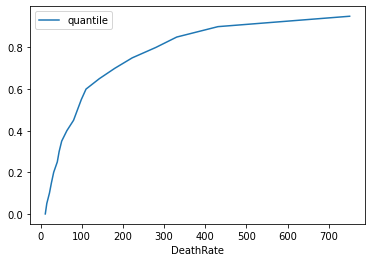

In [80]:
mort_dist.plot.line(y="quantile", x = "DeathRate")

In [82]:
mortality_data["CumDeathRate"] = mortality_data.DeathRate.cumsum()

<AxesSubplot:>

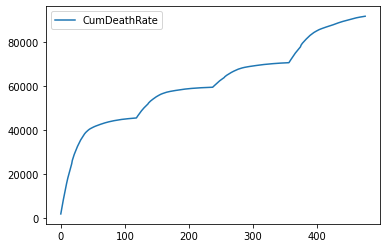

In [85]:
mortality_data.plot.line( y = "CumDeathRate")

### Use Python for column arithmetic

In [86]:
mortality_data['MeanCentered'] = \
    mortality_data.DeathRate - mortality_data.DeathRate.mean()

In [88]:
#mortality_data.head(4)
mortality_data.MeanCentered.describe()

count    4.760000e+02
mean     3.821406e-15
std      2.932242e+02
min     -1.815242e+02
25%     -1.523492e+02
50%     -1.034242e+02
75%      2.965084e+01
max      1.790876e+03
Name: MeanCentered, dtype: float64

In [89]:
mortality_data['DeathRate'] = mortality_data.DeathRate / 100000

In [90]:
mortality_data.head(4)

,Year,AgeGroup,DeathRate,CumDeathRate,MeanCentered
0,1900,1-4 Years,0.019838,1983.8,1790.87584
1,1901,1-4 Years,0.016950,3678.8,1502.07584
2,1902,1-4 Years,0.016557,5334.5,1462.77584
3,1903,1-4 Years,0.015421,6876.6,1349.17584


### Modify the string data in a column

In [91]:
mortality_data.AgeGroup.replace(
    to_replace = ['1-4 Years','5-9 Years'],
    value = ['01-04 Years','05-09 Years'],
    inplace = True)

In [92]:
mortality_data.AgeGroup.replace(
    {'1-4 Years':'01-04 Years','5-9 Years':'05-09 Years'},
    inplace = True)

In [ ]:
# mortality_data['AgeGroup'] = mortality_data.AgeGroup.str.replace('1-4 Years','01-04 Years')
# mortality_data['AgeGroup'] = mortality_data.AgeGroup.str.replace('5-9 Years','05-09 Years')

In [93]:
mortality_data.head(4)

,Year,AgeGroup,DeathRate,CumDeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1983.8,1790.87584
1,1901,01-04 Years,0.016950,3678.8,1502.07584
2,1902,01-04 Years,0.016557,5334.5,1462.77584
3,1903,01-04 Years,0.015421,6876.6,1349.17584


## Shape the data

### Set and use an index

In [94]:
mortality_data = mortality_data.set_index('Year')
mortality_data.head(2)

,AgeGroup,DeathRate,CumDeathRate,MeanCentered
Year,,,,
1900,01-04 Years,0.019838,1983.8,1790.87584
1901,01-04 Years,0.016950,3678.8,1502.07584


In [95]:
mortality_data.reset_index(inplace=True)

In [96]:
# NOTE: the following line of code causes ValueError: Index has duplicate keys
# mortality_data = mortality_data.set_index('Year', verify_integrity=True)
mortality_data

,Year,AgeGroup,DeathRate,CumDeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1983.8,1790.87584
1,1901,01-04 Years,0.016950,3678.8,1502.07584
2,1902,01-04 Years,0.016557,5334.5,1462.77584
3,1903,01-04 Years,0.015421,6876.6,1349.17584
4,1904,01-04 Years,0.015915,8468.1,1398.57584
...,...,...,...,...,...
471,2014,15-19 Years,0.000455,91631.7,-147.42416
472,2015,15-19 Years,0.000483,91680.0,-144.62416
473,2016,15-19 Years,0.000512,91731.2,-141.72416
474,2017,15-19 Years,0.000515,91782.7,-141.42416


In [97]:
mortality_data = mortality_data.set_index(
    ['Year','AgeGroup'], verify_integrity=True)
mortality_data.head(2)

,,DeathRate,CumDeathRate,MeanCentered
Year,AgeGroup,,,
1900,01-04 Years,0.019838,1983.8,1790.87584
1901,01-04 Years,0.016950,3678.8,1502.07584


In [98]:
mortality_data.reset_index(inplace=True)
mortality_data.head(2)

,Year,AgeGroup,DeathRate,CumDeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1983.8,1790.87584
1,1901,01-04 Years,0.016950,3678.8,1502.07584


### Pivot the data

In [100]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values=['DeathRate','MeanCentered'])
mortality_wide.head(3)

DeathRate                                     MeanCentered  \
AgeGroup 01-04 Years 05-09 Years 10-14 Years 15-19 Years  01-04 Years   
Year                                                                    
1900        0.019838    0.004661    0.002983    0.004848   1790.87584   
1901        0.016950    0.004276    0.002736    0.004544   1502.07584   
1902        0.016557    0.004033    0.002525    0.004215   1462.77584   

                                              
AgeGroup 05-09 Years 10-14 Years 15-19 Years  
Year                                          
1900       273.17584   105.37584   291.87584  
1901       234.67584    80.67584   261.47584  
1902       210.37584    59.57584   228.57584

In [102]:
mortality_wide = mortality_data.pivot(
    index=['Year','MeanCentered'], columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)    

AgeGroup           01-04 Years  05-09 Years  10-14 Years  15-19 Years
Year MeanCentered                                                    
1900 105.37584             NaN          NaN     0.002983          NaN
     273.17584             NaN     0.004661          NaN          NaN
     291.87584             NaN          NaN          NaN     0.004848

In [103]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup')
mortality_wide.head(3)

DeathRate                                     CumDeathRate  \
AgeGroup 01-04 Years 05-09 Years 10-14 Years 15-19 Years  01-04 Years   
Year                                                                    
1900        0.019838    0.004661    0.002983    0.004848       1983.8   
1901        0.016950    0.004276    0.002736    0.004544       3678.8   
1902        0.016557    0.004033    0.002525    0.004215       5334.5   

                                             MeanCentered              \
AgeGroup 05-09 Years 10-14 Years 15-19 Years  01-04 Years 05-09 Years   
Year                                                                    
1900         46070.0     59864.0     71209.1   1790.87584   273.17584   
1901         46497.6     60137.6     71663.5   1502.07584   234.67584   
1902         46900.9     60390.1     72085.0   1462.77584   210.37584   

                                  
AgeGroup 10-14 Years 15-19 Years  
Year                              
1900       105.37584   291.87584  
1901        80.67584   261.47584  
1902        59.57584   228.57584

### Melt the data

In [104]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,0.019838,0.004661,0.002983,0.004848
1901,0.016950,0.004276,0.002736,0.004544
1902,0.016557,0.004033,0.002525,0.004215


In [109]:
# get starting data


# save to Excel format to remove indexes
mortality_wide.to_excel('mortality_wide.xlsx')
mortality_wide = pd.read_excel('mortality_wide.xlsx')

mortality_wide.head(4)

,Unnamed: 0,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,0,1900,0.019838,0.004661,0.002983,0.004848
1,1,1901,0.016950,0.004276,0.002736,0.004544
2,2,1902,0.016557,0.004033,0.002525,0.004215
3,3,1903,0.015421,0.004147,0.002682,0.004341


In [110]:
mortality_long = mortality_wide.melt(
    id_vars = 'Year',
    value_vars=['01-04 Years','05-09 Years'],
    var_name ='AgeGroup',
    value_name='DeathRate')

with pd.option_context('display.max_rows', 4):
    display(mortality_long)

,Year,AgeGroup,DeathRate
0,1900,01-04 Years,0.019838
1,1901,01-04 Years,0.016950
...,...,...,...
236,2017,05-09 Years,0.000116
237,2018,05-09 Years,0.000115


## Analyze the data

### Group the data

In [111]:
mortality_data.groupby('AgeGroup').mean()

,Year,DeathRate,CumDeathRate,MeanCentered
AgeGroup,,,,
01-04 Years,1959.0,0.003832,37353.117647,190.301891
05-09 Years,1959.0,0.001173,56497.440336,-75.598109
10-14 Years,1959.0,0.000938,67911.569748,-99.154412
15-19 Years,1959.0,0.001774,85460.104202,-15.549370


In [112]:
mortality_data.groupby('Year').median().head(4)

,DeathRate,CumDeathRate,MeanCentered
Year,,,
1900,0.004755,52967.00,282.52584
1901,0.004410,53317.60,248.07584
1902,0.004124,53645.50,219.47584
1903,0.004244,53986.95,231.47584


In [113]:
mortality_data.groupby(['Year','AgeGroup']).count().head()

DeathRate  CumDeathRate  MeanCentered
Year AgeGroup                                          
1900 01-04 Years          1             1             1
     05-09 Years          1             1             1
     10-14 Years          1             1             1
     15-19 Years          1             1             1
1901 01-04 Years          1             1             1

### Aggregate the data

In [117]:
mortality_data[['AgeGroup','DeathRate']].groupby('AgeGroup').agg(['mean','median','min','max','std'])

DeathRate                                        
                 mean    median       min       max       std
AgeGroup                                                     
01-04 Years  0.003832  0.001091  0.000240  0.019838  0.005005
05-09 Years  0.001173  0.000484  0.000114  0.004661  0.001275
10-14 Years  0.000938  0.000446  0.000139  0.003751  0.000884
15-19 Years  0.001774  0.001069  0.000448  0.007774  0.001384

In [122]:
AgeGS = mortality_data.groupby("AgeGroup")
type(AgeGS)

pandas.core.groupby.generic.DataFrameGroupBy

In [124]:
AgeGS.agg?

Signature: AgeGS.agg(func=None, *args, engine=None, engine_kwargs=None, **kwargs)
Docstring:
Aggregate using one or more operations over the specified axis.

Parameters
----------
func : function, str, list or dict
    Function to use for aggregating the data. If a function, must either
    work when passed a DataFrame or when passed to DataFrame.apply.

    Accepted combinations are:

    - function
    - string function name
    - list of functions and/or function names, e.g. ``[np.sum, 'mean']``
    - dict of axis labels -> functions, function names or list of such.

    Can also accept a Numba JIT function with
    ``engine='numba'`` specified. Only passing a single function is supported
    with this engine.

    If the ``'numba'`` engine is chosen, the function must be
    a user defined function with ``values`` and ``index`` as the
    first and second arguments respectively in the function signature.
    Each group's index will be passed to the user defined function
    and opt

In [ ]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std','nunique'])

In [ ]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std','min','max','var','nunique']).head(3)

In [125]:
def fun_1q(foo): return foo.quantile(0.75)

fun_1q(mortality_data.DeathRate)

0.0022257500000000003

## Visualize the data

In [127]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate']

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,0.019838,0.004661,0.002983,0.004848
1901,0.016950,0.004276,0.002736,0.004544
1902,0.016557,0.004033,0.002525,0.004215
1903,0.015421,0.004147,0.002682,0.004341
1904,0.015915,0.004250,0.003052,0.004714
...,...,...,...,...
2014,0.000240,0.000115,0.000140,0.000455
2015,0.000249,0.000117,0.000146,0.000483
2016,0.000253,0.000122,0.000146,0.000512


<AxesSubplot:xlabel='Year'>

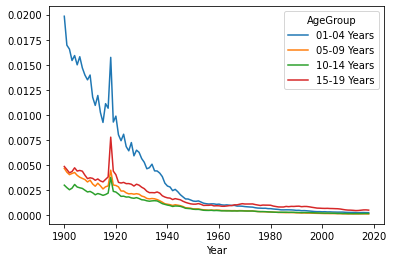

In [126]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

In [128]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std'])

,mean,median,std
AgeGroup,,,
01-04 Years,0.003832,0.001091,0.005005
05-09 Years,0.001173,0.000484,0.001275
10-14 Years,0.000938,0.000446,0.000884
15-19 Years,0.001774,0.001069,0.001384


<AxesSubplot:ylabel='AgeGroup'>

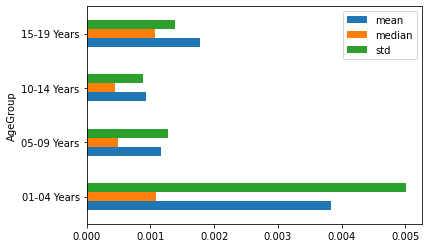

In [129]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std']).plot.barh()